# Unemployment Analysis - OIBSIP Data Science Task 2


##Step 1: Import Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Step 2: Load Dataset

In [6]:
url = "Unemployment in India.csv"
df = pd.read_csv(url)

## Step 3: Basic Exploration

In [7]:
print("First 5 rows:")
print(df.head())

First 5 rows:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [8]:
print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None


In [9]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


##  Step 4: Data Cleaning

In [12]:

df.columns = ['Region','Date','Frequency','Estimated Unemployment Rate (%)',
              'Estimated Employed','Estimated Labour Participation Rate (%)','Area']

# Remove leading/trailing whitespaces from date strings
df['Date'] = df['Date'].str.strip()

# Convert to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


## Step 5: Visualizations


###  1. Unemployment Rate Over Time (India Average)

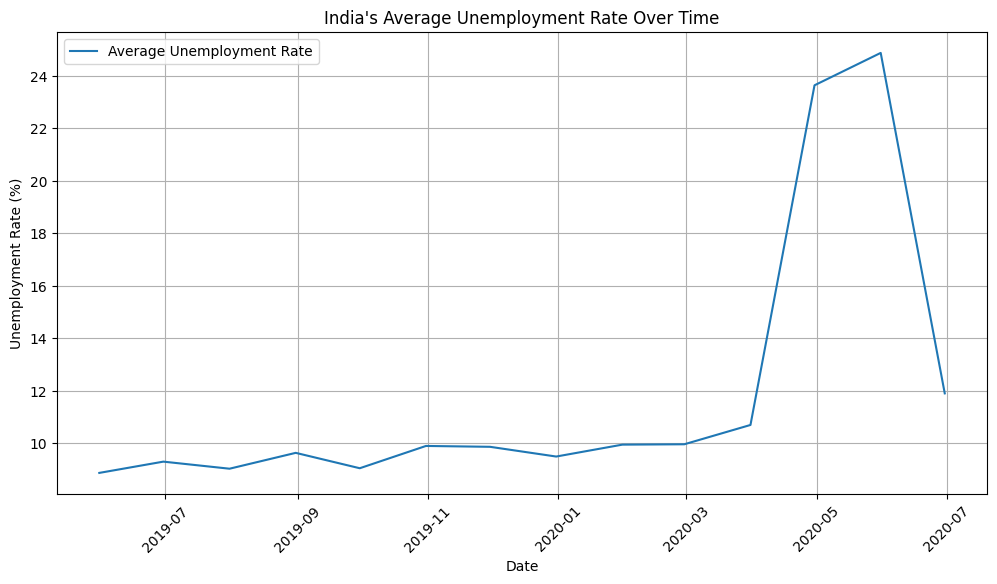

In [13]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df.groupby('Date')['Estimated Unemployment Rate (%)'].mean(), label='Average Unemployment Rate')
plt.title("India's Average Unemployment Rate Over Time")
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 2. State-wise Unemployment Rate in a Specific Month

/tmp/ipython-input-14-4188797002.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Estimated Unemployment Rate (%)', y='Region', data=may2020.sort_values('Estimated Unemployment Rate (%)', ascending=False), palette='Reds_r')


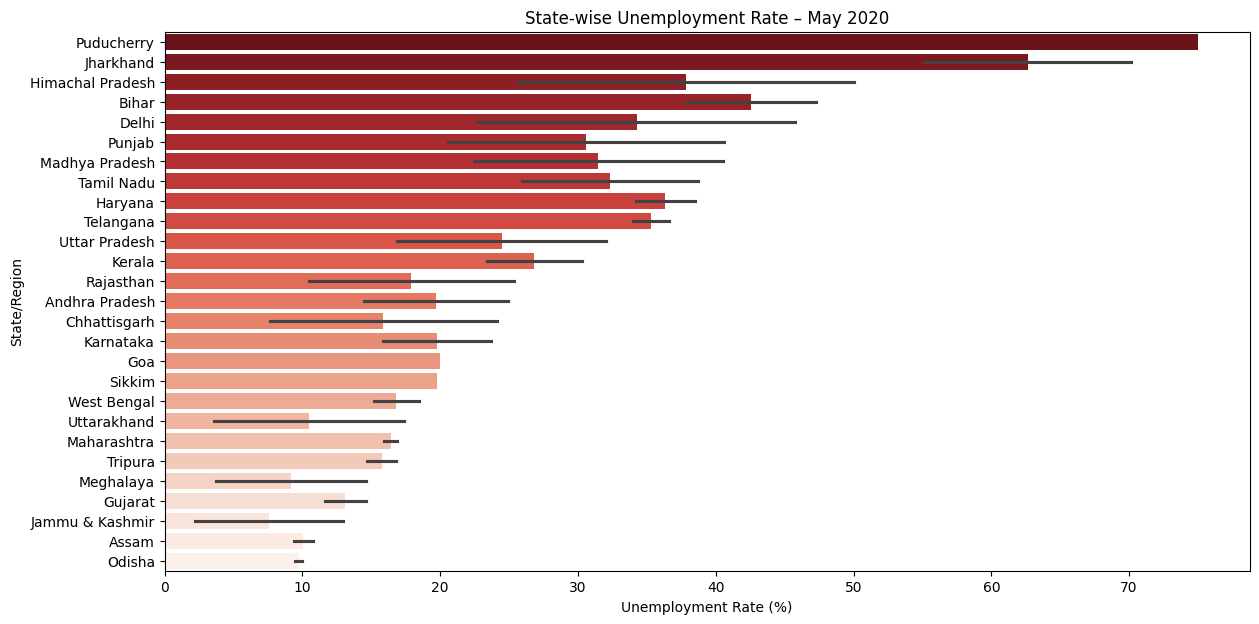

In [14]:
may2020 = df[df['Date'] == '2020-05-31']
plt.figure(figsize=(14,7))
sns.barplot(x='Estimated Unemployment Rate (%)', y='Region', data=may2020.sort_values('Estimated Unemployment Rate (%)', ascending=False), palette='Reds_r')
plt.title("State-wise Unemployment Rate – May 2020")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("State/Region")
plt.show()


### 3. Heatmap of Unemployment Rates (Region vs Time)

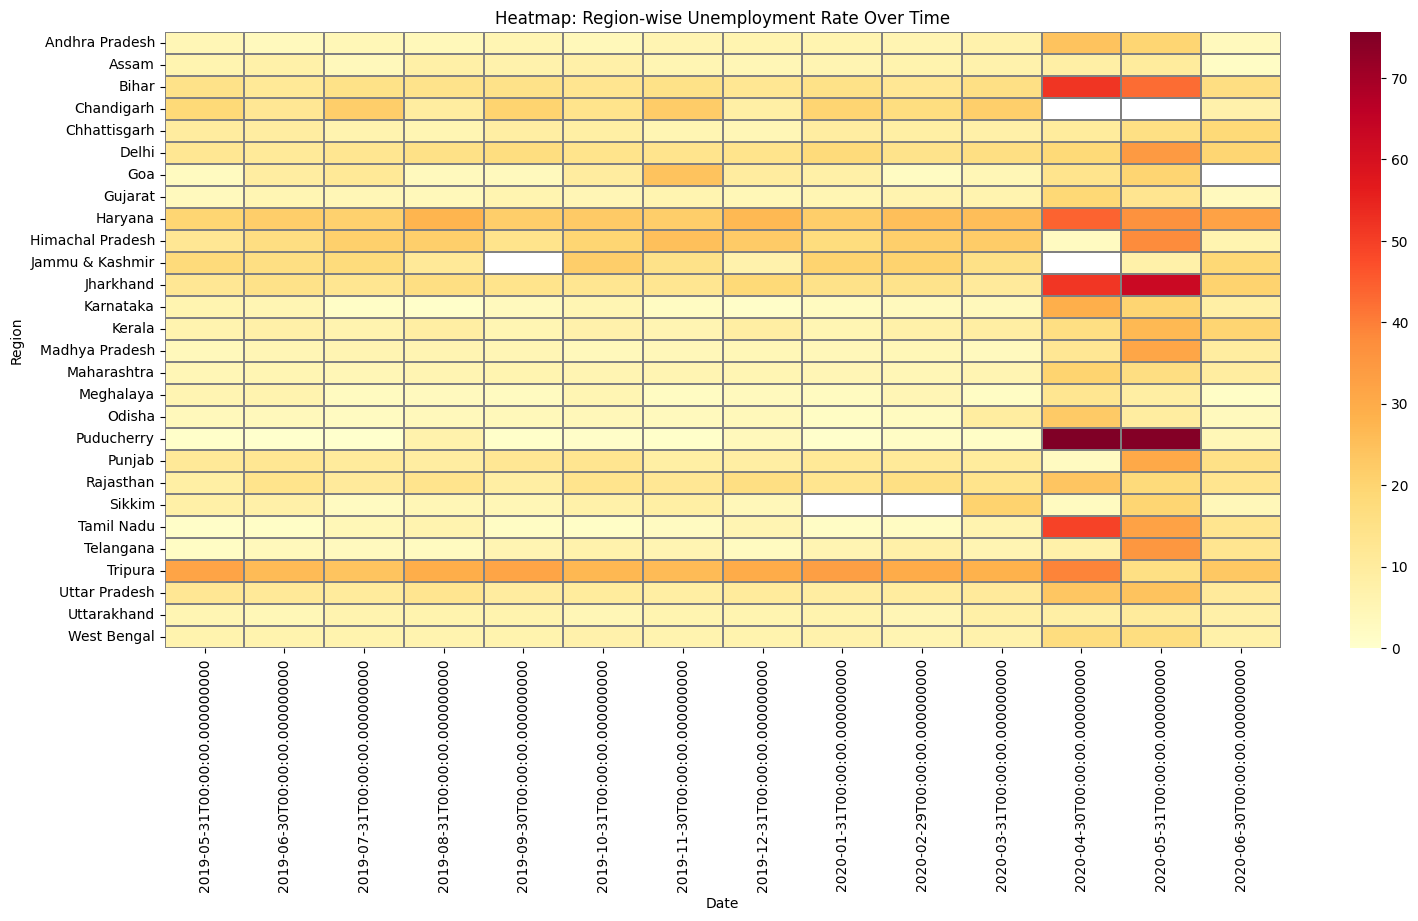

In [15]:
pivot_df = df.pivot_table(values='Estimated Unemployment Rate (%)', index='Region', columns='Date')
plt.figure(figsize=(18,8))
sns.heatmap(pivot_df, cmap='YlOrRd', linewidths=0.1, linecolor='gray')
plt.title("Heatmap: Region-wise Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Region")
plt.show()


### 4. Compare Employed vs Unemployed Trends

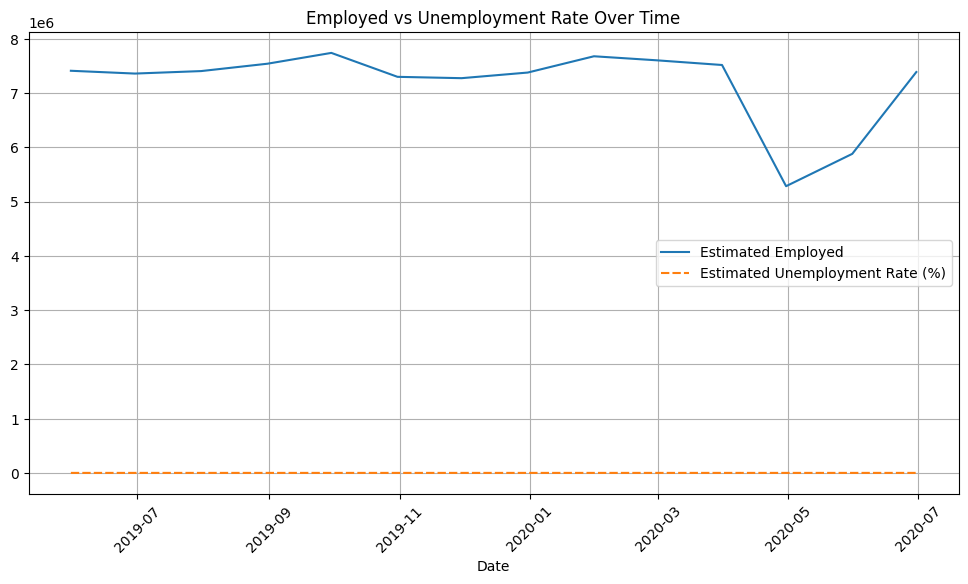

In [16]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df.groupby('Date')[['Estimated Employed','Estimated Unemployment Rate (%)']].mean())
plt.title("Employed vs Unemployment Rate Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
